In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [2]:
def line_plot(df, iqr, hampler, lof):
    plt.figure(figsize=(12, 3))
    plt.scatter(iqr, df.iloc[iqr], color='red', s=15)
    plt.scatter(hampler, df.iloc[hampler], color='green', s=15)
    plt.scatter(lof, df.iloc[lof], color='black', s=15)
    
    plt.plot(df.index.tolist(), df.iloc[:,0], marker='.', markersize=3)

def create_df(series):
    df = pd.DataFrame(series, columns=['series'])
    return df
    
def df_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    indexes = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))].dropna().index.tolist()
    return indexes

def df_hampler(df):
    mean = df.series.mean()
    std = df.series.std()
    
    med = df.series.median()
    
    # disabling - too many data points
    # mad = (df - df.median()).abs().median()
    
    # z-score
    low = mean - 3 * std
    high = mean + 3 * std
    
    indexes = df[(df < low) | (df > high)].dropna().index.tolist()
    return indexes

def lof(df, limit):
    clf = LocalOutlierFactor(n_neighbors=10)
    clf.fit_predict(df)

    df['negative_outlier_factor'] = clf.negative_outlier_factor_
    indexes = df[(df.negative_outlier_factor < limit)].index.tolist()
    df.drop(columns=['negative_outlier_factor'], inplace=True)
    return indexes


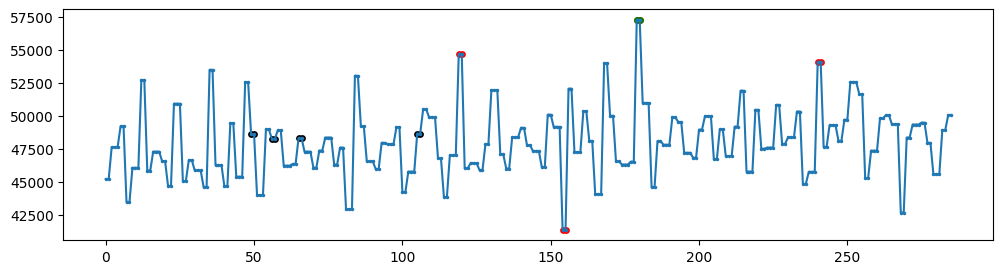

In [3]:
series = [45216, 45216, 47624, 47624, 47624, 49208, 49208, 43456, 43456, 46064, 46064, 46064, 52704, 52704, 45856, 45856, 47288, 47288, 47288, 46568, 46568, 44696, 44696, 50912, 50912, 50912, 45048, 45048, 46648, 46648, 45864, 45864, 45864, 44592, 44592, 53472, 53472, 46272, 46272, 46272, 44656, 44656, 49440, 49440, 45392, 45392, 45392, 52536, 52536, 48592, 48592, 43992, 43992, 43992, 48968, 48968, 48248, 48248, 48896, 48896, 46224, 46224, 46224, 46352, 46352, 48312, 48312, 47288, 47288, 47288, 46072, 46072, 47368, 47368, 48352, 48352, 48352, 46304, 46304, 47592, 47592, 42920, 42920, 42920, 53024, 53024, 49200, 49200, 46544, 46544, 46544, 45968, 45968, 47952, 47952, 47840, 47840, 47840, 49144, 49144, 44224, 44224, 45776, 45776, 45776, 48648, 48648, 50488, 50488, 49888, 49888, 49888, 46784, 46784, 43848, 43848, 47008, 47008, 47008, 54680, 54680, 46024, 46024, 46416, 46416, 46416, 45888, 45888, 47856, 47856, 51944, 51944, 51944, 47088, 47088, 46008, 46008, 48368, 48368, 48368, 49088, 49088, 47768, 47768, 47336, 47336, 47336, 46104, 46104, 50080, 50080, 49160, 49160, 49160, 41376, 41376, 52048, 52048, 47248, 47248, 47248, 50352, 50352, 48096, 48096, 44064, 44064, 44064, 53960, 53960, 50000, 50000, 46544, 46544, 46312, 46312, 46312, 46528, 46528, 57256, 57256, 50968, 50968, 50968, 44584, 44584, 48088, 48088, 47808, 47808, 47808, 49880, 49880, 49528, 49528, 47200, 47200, 47200, 46824, 46824, 48952, 48952, 49968, 49968, 49968, 46696, 46696, 48984, 48984, 46952, 46952, 46952, 49176, 49176, 51896, 51896, 45776, 45776, 45776, 50448, 50448, 47504, 47504, 47592, 47592, 47592, 50824, 50824, 47872, 47872, 48360, 48360, 48360, 50320, 50320, 44840, 44840, 45760, 45760, 45760, 54080, 54080, 47640, 47640, 49288, 49288, 49288, 48104, 48104, 49696, 49696, 52552, 52552, 52552, 51640, 51640, 45288, 45288, 47360, 47360, 47360, 49800, 49800, 50040, 50040, 49360, 49360, 49360, 42680, 42680, 48352, 48352, 49336, 49336, 49336, 49480, 49480, 47952, 47952, 45568, 45568, 45568, 48920, 48920, 50056, 50056]
df = create_df(series)

idx = df_iqr(df)
idx2 = df_hampler(df)
idx3 = lof(df, -3)
line_plot(df, idx, idx2, idx3)

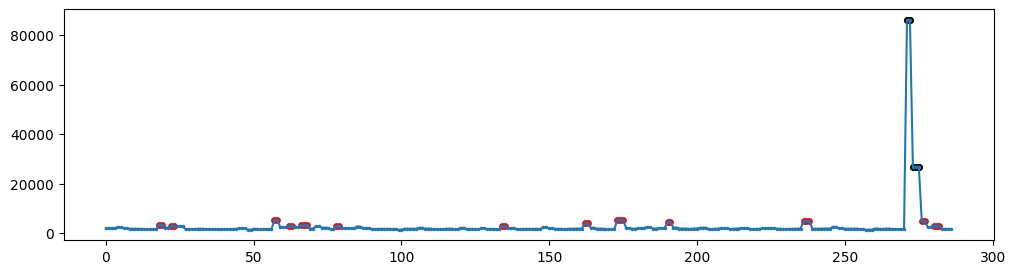

In [4]:
series = [1864, 1864, 1864, 1864, 2472, 2472, 1992, 1992, 1744, 1744, 1744, 1720, 1720, 1592, 1592, 1608, 1608, 1608, 3392, 3392, 2256, 2256, 3000, 3000, 2720, 2720, 2720, 1464, 1464, 1544, 1544, 1760, 1760, 1760, 1536, 1536, 1608, 1608, 1496, 1496, 1496, 1616, 1616, 1712, 1712, 1904, 1904, 1904, 1400, 1400, 1728, 1728, 1488, 1488, 1488, 1568, 1568, 5200, 5200, 2472, 2472, 2472, 2952, 2952, 2464, 2464, 3200, 3200, 3200, 1808, 1808, 2728, 2728, 2192, 2192, 2192, 1600, 1600, 2928, 2928, 2032, 2032, 2032, 1976, 1976, 2664, 2664, 1992, 1992, 1992, 1632, 1632, 1688, 1688, 1728, 1728, 1728, 1496, 1496, 1344, 1344, 1768, 1768, 1768, 1744, 1744, 2200, 2200, 1800, 1800, 1800, 1576, 1576, 1504, 1504, 1776, 1776, 1776, 1568, 1568, 2112, 2112, 1680, 1680, 1680, 1528, 1528, 1896, 1896, 1688, 1688, 1688, 1472, 1472, 2864, 2864, 1896, 1896, 1896, 1552, 1552, 1688, 1688, 1720, 1720, 1720, 1680, 1680, 2320, 2320, 1880, 1880, 1736, 1736, 1736, 1624, 1624, 1752, 1752, 1808, 1808, 1808, 3928, 3928, 2184, 2184, 1792, 1792, 1792, 1552, 1552, 1528, 1528, 5320, 5320, 5320, 2072, 2072, 1784, 1784, 2008, 2008, 2008, 2488, 2488, 1832, 1832, 2008, 2008, 2008, 4320, 4320, 2232, 2232, 1848, 1848, 1848, 1712, 1712, 1840, 1840, 2160, 2160, 2160, 1576, 1576, 1800, 1800, 1952, 1952, 1952, 1680, 1680, 1824, 1824, 2024, 2024, 2024, 1656, 1656, 1720, 1720, 1872, 1872, 1872, 2064, 2064, 1776, 1776, 1664, 1664, 1664, 1728, 1728, 1792, 1792, 4864, 4864, 4864, 1752, 1752, 1800, 1800, 1856, 1856, 1856, 2536, 2536, 1888, 1888, 1768, 1768, 1768, 1808, 1808, 1560, 1560, 1376, 1376, 1376, 1808, 1808, 1672, 1672, 1800, 1800, 1656, 1656, 1656, 1552, 1552, 86176, 86176, 26800, 26800, 26800, 4952, 4952, 2424, 2424, 3024, 3024, 3024, 1704, 1704, 1664, 1664]
df = create_df(series)

idx = df_iqr(df)
idx2 = df_hampler(df)
idx3 = lof(df, -3)
line_plot(df, idx, idx2, idx3)

[ 3392  3392  3000  3000  5200  5200  2952  2952  3200  3200  3200  2928
  2928  2864  2864  3928  3928  5320  5320  5320  4320  4320  4864  4864
  4864 86176 86176 26800 26800 26800  4952  4952  3024  3024  3024]
     series
18     3392
19     3392
22     3000
23     3000
57     5200
58     5200
62     2952
63     2952
66     3200
67     3200
68     3200
78     2928
79     2928
134    2864
135    2864
162    3928
163    3928
173    5320
174    5320
175    5320
190    4320
191    4320
236    4864
237    4864
238    4864
271   86176
272   86176
273   26800
274   26800
275   26800
276    4952
277    4952
280    3024
281    3024
282    3024


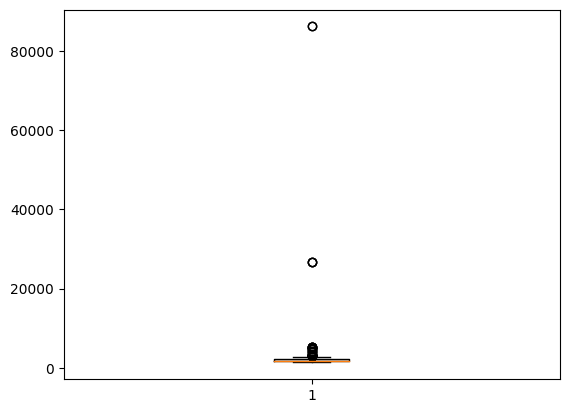

In [5]:
outliers = plt.boxplot(df)["fliers"][0].get_data()[1]
print(outliers)
print(df.iloc[idx])

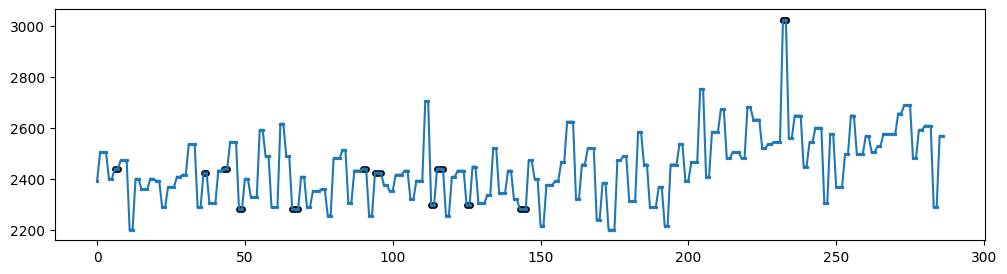

In [6]:
series = np.asarray([2392,2504,2504,2504,2400,2400,2440,2440,2472,2472,2472,2200,2200,2400,2400,2360,2360,2360,2400,2400,2392,2392,2288,2288,2368,2368,2368,2408,2408,2416,2416,2536,2536,2536,2288,2288,2424,2424,2304,2304,2304,2432,2432,2440,2440,2544,2544,2544,2280,2280,2400,2400,2328,2328,2328,2592,2592,2488,2488,2288,2288,2288,2616,2616,2488,2488,2280,2280,2280,2408,2408,2288,2288,2352,2352,2352,2360,2360,2256,2256,2480,2480,2480,2512,2512,2304,2304,2432,2432,2432,2440,2440,2256,2256,2424,2424,2424,2376,2376,2352,2352,2416,2416,2416,2432,2432,2320,2320,2392,2392,2392,2704,2704,2296,2296,2440,2440,2440,2256,2256,2408,2408,2432,2432,2432,2296,2296,2448,2448,2304,2304,2304,2336,2336,2520,2520,2344,2344,2344,2432,2432,2320,2320,2280,2280,2280,2472,2472,2400,2400,2216,2216,2376,2376,2376,2392,2392,2464,2464,2624,2624,2624,2320,2320,2456,2456,2520,2520,2520,2240,2240,2384,2384,2200,2200,2200,2472,2472,2488,2488,2312,2312,2312,2584,2584,2456,2456,2288,2288,2288,2368,2368,2216,2216,2456,2456,2456,2536,2536,2392,2392,2464,2464,2464,2752,2752,2408,2408,2584,2584,2584,2672,2672,2480,2480,2504,2504,2504,2480,2480,2680,2680,2632,2632,2632,2520,2520,2536,2536,2544,2544,2544,3024,3024,2560,2560,2648,2648,2648,2448,2448,2544,2544,2600,2600,2600,2304,2304,2576,2576,2368,2368,2368,2496,2496,2648,2648,2496,2496,2496,2568,2568,2504,2504,2528,2528,2576,2576,2576,2576,2576,2656,2656,2688,2688,2688,2480,2480,2592,2592,2608,2608,2608,2288,2288,2568,2568])
df = create_df(series)

idx = df_iqr(df)
idx2 = df_hampler(df)
idx3 = lof(df, -3)
line_plot(df, idx, idx2, idx3)

[3024 3024]
     series
232    3024
233    3024


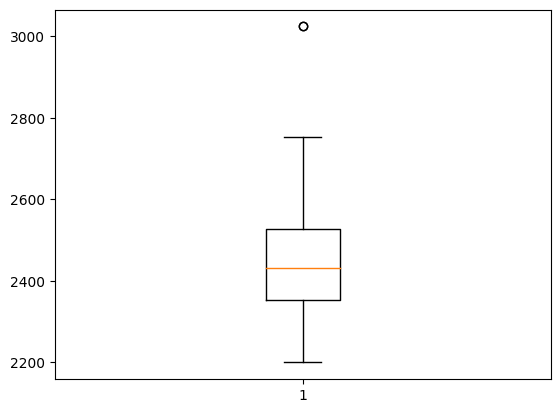

In [7]:
outliers = plt.boxplot(df)["fliers"][0].get_data()[1]
print(outliers)
print(df.iloc[idx])

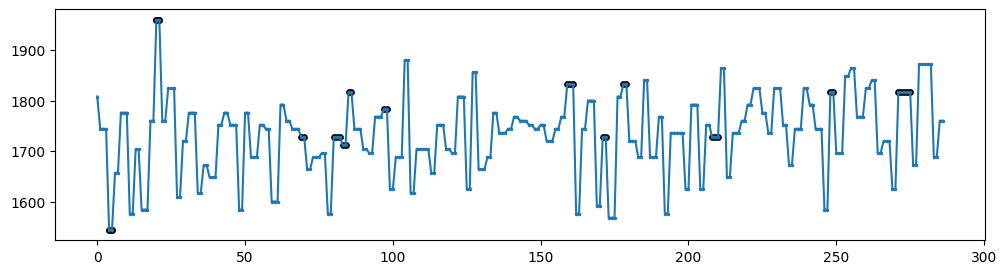

In [8]:
series = np.asarray([1808,1744,1744,1744,1544,1544,1656,1656,1776,1776,1776,1576,1576,1704,1704,1584,1584,1584,1760,1760,1960,1960,1760,1760,1824,1824,1824,1608,1608,1720,1720,1776,1776,1776,1616,1616,1672,1672,1648,1648,1648,1752,1752,1776,1776,1752,1752,1752,1584,1584,1776,1776,1688,1688,1688,1752,1752,1744,1744,1600,1600,1600,1792,1792,1760,1760,1744,1744,1744,1728,1728,1664,1664,1688,1688,1688,1696,1696,1576,1576,1728,1728,1728,1712,1712,1816,1816,1744,1744,1744,1704,1704,1696,1696,1768,1768,1768,1784,1784,1624,1624,1688,1688,1688,1880,1880,1616,1616,1704,1704,1704,1704,1704,1656,1656,1752,1752,1752,1704,1704,1696,1696,1808,1808,1808,1624,1624,1856,1856,1664,1664,1664,1688,1688,1776,1776,1736,1736,1736,1744,1744,1768,1768,1760,1760,1760,1752,1752,1744,1744,1752,1752,1720,1720,1720,1744,1744,1768,1768,1832,1832,1832,1576,1576,1744,1744,1800,1800,1800,1592,1592,1728,1728,1568,1568,1568,1808,1808,1832,1832,1720,1720,1720,1688,1688,1840,1840,1688,1688,1688,1768,1768,1576,1576,1736,1736,1736,1736,1736,1624,1624,1792,1792,1792,1624,1624,1752,1752,1728,1728,1728,1864,1864,1648,1648,1736,1736,1736,1760,1760,1792,1792,1824,1824,1824,1776,1776,1736,1736,1824,1824,1824,1752,1752,1672,1672,1744,1744,1744,1824,1824,1792,1792,1744,1744,1744,1584,1584,1816,1816,1696,1696,1696,1848,1848,1864,1864,1768,1768,1768,1824,1824,1840,1840,1696,1696,1720,1720,1720,1624,1624,1816,1816,1816,1816,1816,1672,1672,1872,1872,1872,1872,1872,1688,1688,1760,1760])
df = create_df(series)

idx = df_iqr(df)
idx2 = df_hampler(df)
idx3 = lof(df, -3)
line_plot(df, idx, idx2, idx3)

[1544 1544 1960 1960]
    series
4     1544
5     1544
20    1960
21    1960


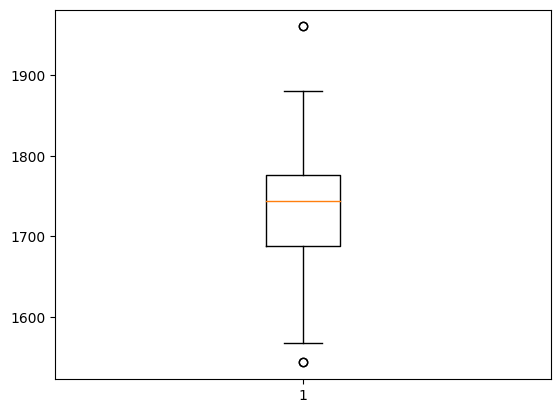

In [9]:
outliers = plt.boxplot(df)["fliers"][0].get_data()[1]
print(outliers)
print(df.iloc[idx])

In [23]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Set the contamination parameter
isolation_forest.fit(df)  # Fit the model

# Predict outliers
y_pred = isolation_forest.predict(df)  # Returns 1 for inliers, -1 for outliers
y_pred

/Users/piyushr/workspace/personal/venv/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

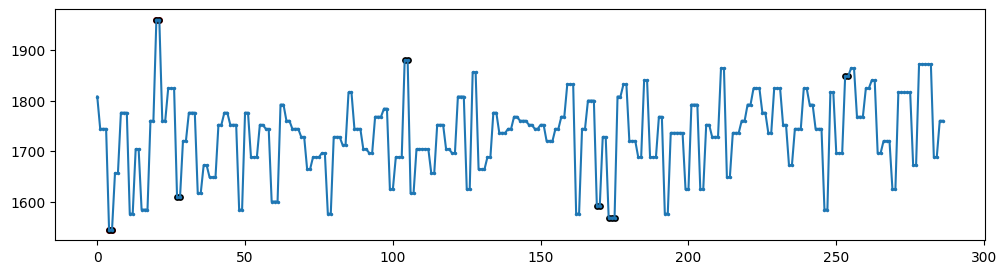

In [24]:
df['iso'] = y_pred
idx4 = df[(df.iso == -1)].index.tolist()
df.drop(columns=['iso'], inplace=True)
line_plot(df, idx, idx2, idx4)

In [26]:
df.shape[1]

1

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_dim = df.shape[1]
encoding_dim = 2  # Reduced dimensionality for encoding
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
epochs = 50
batch_size = 16
autoencoder.fit(df, df, epochs=epochs, batch_size=batch_size, shuffle=True)

# Calculate the reconstruction errors for all data points
reconstructed_X = autoencoder.predict(df)
mse = np.mean(np.square(df - reconstructed_X), axis=1)

# Set a threshold to identify outliers
threshold = np.percentile(mse, 95)  # 95th percentile as the threshold

# Identify outliers based on the reconstruction errors
outliers = df[mse > threshold]

Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.5000
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.5000
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.5000
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.2500
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.2500
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.2500
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.0000
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.2500
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 3002695.7500
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.5000
Epoch 11/50
18/18 [==============================] - 0s 1ms/step - loss: 3002696.2500
Epoch 12/50
18/18 [==============================] - 0s 1ms/ste

In [31]:
outliers

,series
20,1960
21,1960
104,1880
105,1880
127,1856
128,1856
211,1864
212,1864
255,1864
256,1864
